In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://drive.google.com/file/d/1BFqSrM-Pur8jn-kTB8abwnFI8tcoboI7/view?usp=sharing

In [3]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1BFqSrM-Pur8jn-kTB8abwnFI8tcoboI7

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1BFqSrM-Pur8jn-kTB8abwnFI8tcoboI7
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 69.4MB/s]


##Data Preparation & Visualization

In [4]:
import pandas as pd
df = pd.read_csv('/content/heart.csv')
df.info()
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
for i in df.columns:
 print('Number of NaN in',i,'=',df.isna().sum().sum())

Number of NaN in age = 0
Number of NaN in sex = 0
Number of NaN in cp = 0
Number of NaN in trestbps = 0
Number of NaN in chol = 0
Number of NaN in fbs = 0
Number of NaN in restecg = 0
Number of NaN in thalach = 0
Number of NaN in exang = 0
Number of NaN in oldpeak = 0
Number of NaN in slope = 0
Number of NaN in ca = 0
Number of NaN in thal = 0
Number of NaN in target = 0


In [6]:
df.groupby('target').size()

target
0    499
1    526
dtype: int64

<Axes: >

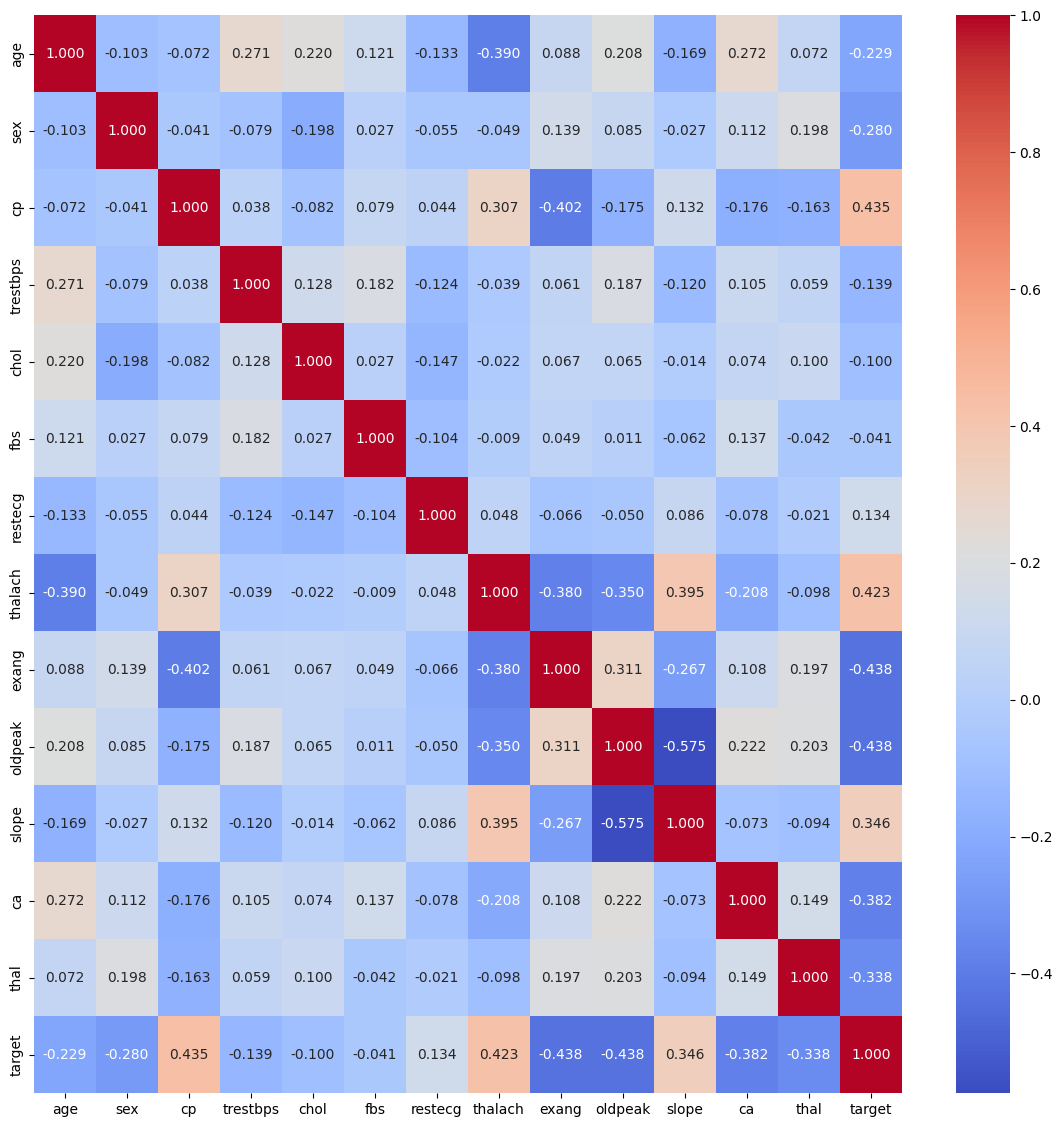

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap using seaborn
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', yticklabels=corr_matrix.columns)

<Axes: >

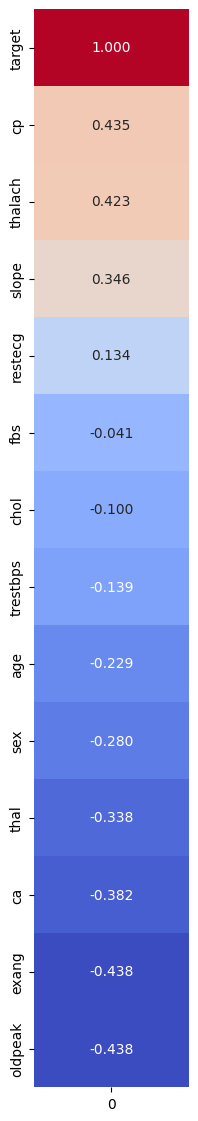

In [8]:
corr_matrix = df.corrwith(df['target']).sort_values(ascending=False)

# Create heatmap using seaborn
plt.figure(figsize=(2,14))
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm', fmt='.3f', cbar=False)

##Spliting Data

In [9]:
import pandas as pd
import numpy as np
np.random.seed(64)
# Convert DataFrame to a numpy array
array = df.values  #  numpy array
np.random.shuffle(array)  # Shuffle the array
shuffled_df = pd.DataFrame(array, columns=df.columns)
print(shuffled_df)

#Test & Train
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(shuffled_df.drop(['target'], axis=1), shuffled_df['target'], test_size=0.2, random_state=64)
# Save train and test data to new CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Save train and test labels to new CSV files
train_label.to_csv('train_label.csv', index=False)
test_label.to_csv('test_label.csv', index=False)

# Print shape of each set
print(f"train_data shape: {train_data.shape}")
print(f"test_data shape: {test_data.shape}")
print(f"train_label shape: {train_label.shape}")
print(f"test_label shape: {test_label.shape}")

       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     65.0  1.0  0.0     110.0  248.0  0.0      0.0    158.0    0.0      0.6   
1     52.0  0.0  2.0     136.0  196.0  0.0      0.0    169.0    0.0      0.1   
2     45.0  1.0  3.0     110.0  264.0  0.0      1.0    132.0    0.0      1.2   
3     53.0  1.0  0.0     123.0  282.0  0.0      1.0     95.0    1.0      2.0   
4     60.0  0.0  2.0     102.0  318.0  0.0      1.0    160.0    0.0      0.0   
...    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
1020  55.0  1.0  0.0     140.0  217.0  0.0      1.0    111.0    1.0      5.6   
1021  56.0  1.0  0.0     132.0  184.0  0.0      0.0    105.0    1.0      2.1   
1022  42.0  1.0  1.0     120.0  295.0  0.0      1.0    162.0    0.0      0.0   
1023  42.0  1.0  0.0     136.0  315.0  0.0      1.0    125.0    1.0      1.8   
1024  66.0  0.0  0.0     178.0  228.0  1.0      1.0    165.0    1.0      1.0   

      slope   ca  thal  target  
0     

##StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_data)
X_train = scaler.transform(train_data)
# scale the test data using the same scaler used for training data
X_test = scaler.transform(test_data)
y_train=train_label
y_test=test_label
print('train:',X_train.shape, y_train.shape,'\ntest: ', X_test.shape, y_test.shape)

train: (820, 13) (820,) 
test:  (205, 13) (205,)


##**NaiveBayes Classifier**

In [11]:
from sklearn.naive_bayes import GaussianNB
SKNB=GaussianNB()
SKNB.fit(X_train,y_train.ravel())
pred = SKNB.predict(X_test)
print(pred)

[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]


##Evaluation

###confusion_matrix

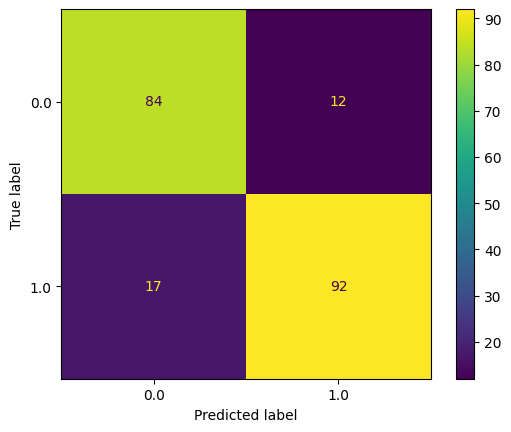

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,pred)
names = list(shuffled_df.groupby('target').groups.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
disp.plot()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy :',accuracy_score(y_test,pred))
print('Precision :',precision_score(y_test,pred))
print('Recall :',recall_score(y_test,pred))
print('F1 score :',f1_score(y_test,pred))

Accuracy : 0.8585365853658536
Precision : 0.8846153846153846
Recall : 0.8440366972477065
F1 score : 0.863849765258216


####micro & macro

In [14]:
print('Precision_micro :',precision_score(y_test,pred,average='micro'))
print('Precision_macro :',precision_score(y_test,pred,average='macro'))

print('Recall_micro :',recall_score(y_test,pred,average='micro'))
print('Recall_macro :',recall_score(y_test,pred,average='macro'))

print('F1 score_micro :',f1_score(y_test,pred,average='micro'))
print('F1 score_macro :',f1_score(y_test,pred,average='macro'))

Precision_micro : 0.8585365853658536
Precision_macro : 0.8581492764661081
Recall_micro : 0.8585365853658536
Recall_macro : 0.8595183486238532
F1 score_micro : 0.8585365853658536
F1 score_macro : 0.8583208217154024


###classification_report

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85        96
         1.0       0.88      0.84      0.86       109

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205

